# Heart Disease Prediction - Team 19

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('./heart.csv')
df.head()
df_target_0 = df[df['target'] == 0]
df_target_0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [3]:
# Rename columns
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP',
              'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [4]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              303 non-null    int64  
 1   Sex              303 non-null    int64  
 2   ChestPainType    303 non-null    int64  
 3   RestingBP        303 non-null    int64  
 4   Cholesterol      303 non-null    int64  
 5   FastingBS        303 non-null    int64  
 6   RestingECG       303 non-null    int64  
 7   MaxHR            303 non-null    int64  
 8   ExerciseAngina   303 non-null    int64  
 9   Oldpeak          303 non-null    float64
 10  ST_Slope         303 non-null    int64  
 11  NumMajorVessels  303 non-null    int64  
 12  Thal             303 non-null    int64  
 13  Target           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df['Target'].unique()

array([1, 0])

# Data Splitting and Scaling

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# divide into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set - make mean = 0 and standard deviation = 1
scaler = StandardScaler()

# scaling independently so avoid data leakage.
# like mean and variance would be shared otherwise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Evaluating

In [ ]:
# training using multiple algorithms

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=2000, learning_rate_init=0.001)
}

In [ ]:
# metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []

# train and evaluate each model using cross-validation, k = 10
for name, model in models.items():
    start_time = time()
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)
    end_time = time()
    elapsed_time = end_time - start_time

    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Time (s)': elapsed_time
    })

    print(f"{name} completed in {elapsed_time:4f} seconds.")

Logistic Regression completed in 0.198677 seconds.
Random Forest completed in 2.995007 seconds.
SVM completed in 0.327396 seconds.
Decision Tree completed in 0.176636 seconds.
KNN completed in 0.238773 seconds.
Naive Bayes completed in 0.166951 seconds.
Gradient Boosting completed in 2.223984 seconds.
AdaBoost completed in 1.915714 seconds.
Bagging Classifier completed in 0.730696 seconds.
MLP Classifier completed in 23.407698 seconds.


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
# Save the scaler for prediction
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the trained models
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model {name} saved to {filename}")

Model Logistic Regression saved to logistic_regression.pkl
Model Random Forest saved to random_forest.pkl
Model SVM saved to svm.pkl
Model Decision Tree saved to decision_tree.pkl
Model KNN saved to knn.pkl
Model Naive Bayes saved to naive_bayes.pkl
Model Gradient Boosting saved to gradient_boosting.pkl
Model AdaBoost saved to adaboost.pkl
Model Bagging Classifier saved to bagging_classifier.pkl
Model MLP Classifier saved to mlp_classifier.pkl


# Results

In [15]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-score,Time (s)
7,AdaBoost,0.813667,0.834815,0.825824,0.828212,1.915714
1,Random Forest,0.810000,0.829116,0.835165,0.829090,2.995007
2,SVM,0.810000,0.827590,0.841758,0.830433,0.327396
0,Logistic Regression,0.806333,0.806671,0.857143,0.827717,0.198677
6,Gradient Boosting,0.805333,0.836525,0.810989,0.819473,2.223984
5,Naive Bayes,0.793500,0.806955,0.826923,0.813215,0.166951
4,KNN,0.793333,0.801062,0.842308,0.817965,0.238773
9,MLP Classifier,0.780833,0.810015,0.789560,0.796871,23.407698
8,Bagging Classifier,0.776833,0.835664,0.751648,0.787215,0.730696
3,Decision Tree,0.731333,0.750337,0.781319,0.762342,0.176636


# Plotting

<ipython-input-16-32967358ad11>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


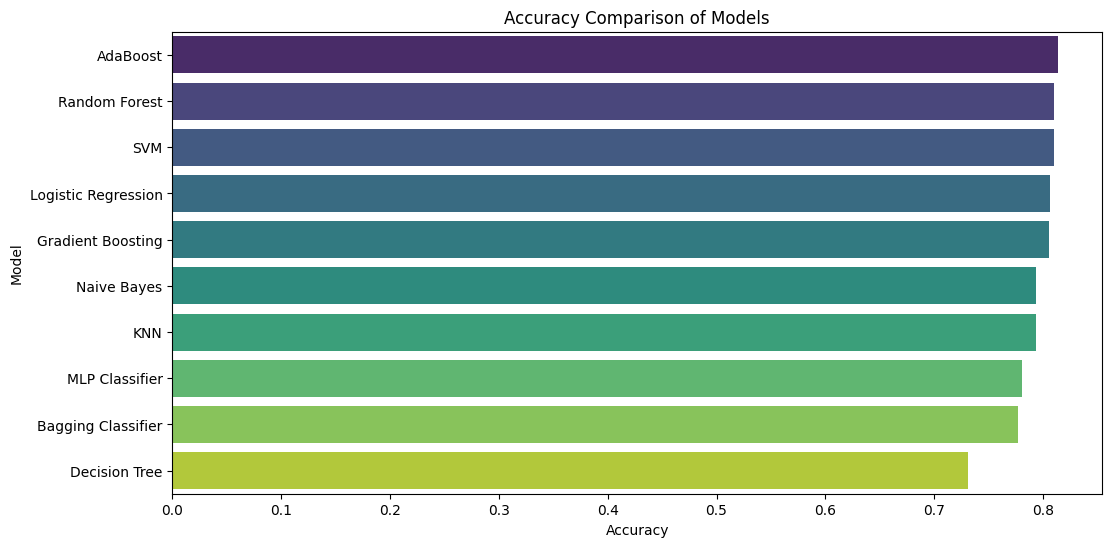

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot accuarcy of models
plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

<ipython-input-17-7ae744557a88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")


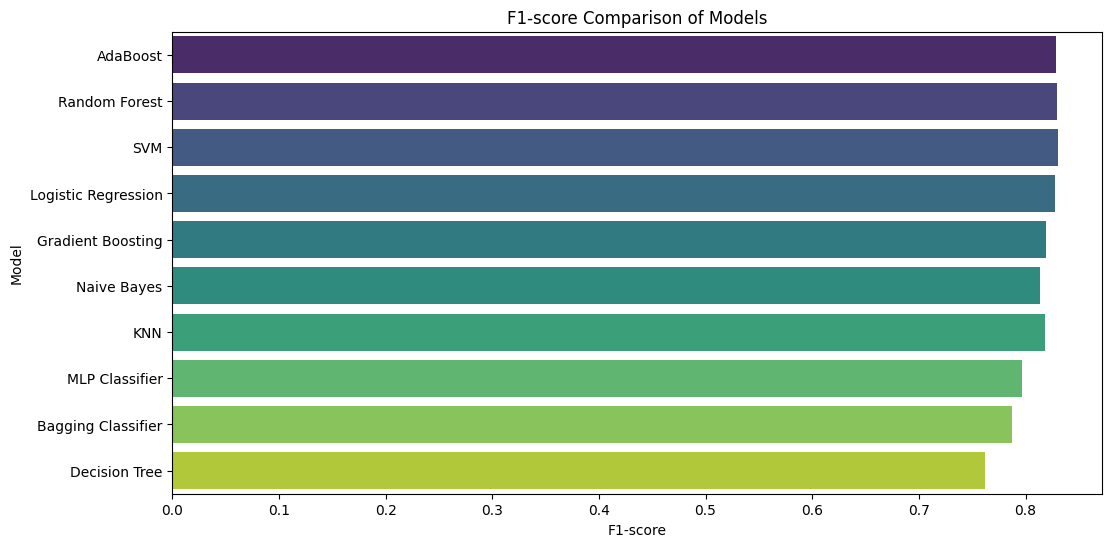

In [ ]:
# plot f1 scores
plt.figure(figsize=(12,6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

<ipython-input-18-54a2b48d9ac6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")


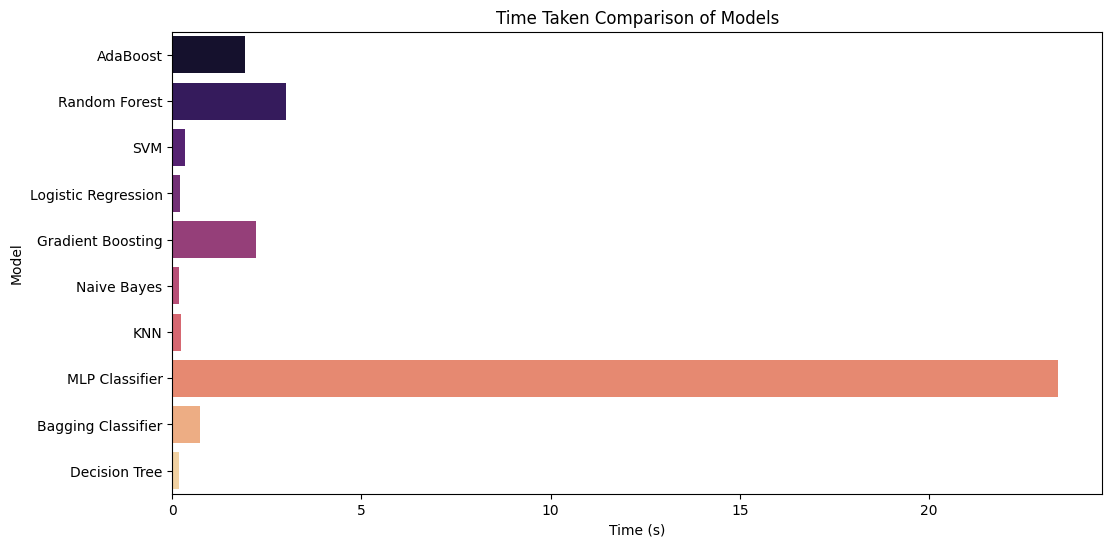

In [ ]:
# plot time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()